# Loading packages

In [96]:
# Tải những gói lệnh cần thiết:

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
import seaborn as sns



#from ElementTree import xml.etree
from xml.dom import minidom
import xml.etree.ElementTree as ET


%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)

# Tải tập dữ liệu:

In [97]:
#train = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Kaggle_MaSSP/train.csv')
#test  = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Kaggle_MaSSP/test.csv')

train_original = pd.read_csv('/Users/kong/Desktop/massp_2021/porto-seguro-safe-driver-prediction/train.csv')
test_original = pd.read_csv('/Users/kong/Desktop/massp_2021/porto-seguro-safe-driver-prediction/test.csv')

#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')


In [98]:
train = train_original.copy(deep=True)
test = test_original.copy(deep=True)

# Những thông tin cơ bản về các tập data train và test:

## Tập train

### Chú ý về số chiều, sự trùng lặp và tính mất cân bằng của target

In [99]:
# Size of data set: train:
print("Kích thước tập dữ liệu train: {}".format(train.shape))

Kích thước tập dữ liệu train: (595212, 59)


In [100]:
# Checking duplicate:
train.drop_duplicates()
train.shape

(595212, 59)

- Nhận xét: tập dữ liệu train không có những hàng trùng lặp.

In [101]:
# Observe the target feature:
#train.columns.values
train.target.value_counts()
# Có 1: có khiếu nại từ khách hàng về giá cước gói bảo hiểm.
# Có 0: khách hàng không có vấn đề gì.

0    573518
1     21694
Name: target, dtype: int64

- Nhận xét: tập data rất imbalance, số lượng khách hàng không có vấn đề khiếu nại gấp: 26.5 lần số người có vấn đề khiếu nại.
        
- Nhận xét: tập data, target rất imbalanced ==> Hầu hết trường hợp, target đều nhận giá trị 0.

In [102]:
# Visualize the target feature:
data = [go.Bar(x=train['target'].value_counts().index.values,
              y=train['target'].value_counts().values,
              text="Distribution of target variable")]
layout = go.Layout(title='Phân phối giá trị biến target')

fig = go.Figure(data=data, layout = layout)

py.iplot(fig, filename='baisc-bar')

### Ý nghĩa của các biến:

In [103]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


- Nhận xét: những features nằm trong một nhóm lớn được gắn với những cái tên (e.g: ind, reg, car, calc)
    
- Những features có postfix là bin nghĩa là binary features; cat ám chỉ: categorical features
    
- Những features không có postfix đặc biệt: hoặc là continuous hoặc là ordinal.

Nominal "named variables"
 
Ordinal "Named+Ordered variables" 

Interval "Named+Ordered+Propotionate interval between variables" 

Ratio "Named+Ordered+Propotionate interval between variables + can accommodate absolute value"

- Giá trị -1 indicates NaN trong tập data set

- Các categorical variables chỉ nhận giá trị nguyên.

- Các variables khác: hoặc nguyên/ hoặc float.

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

- Nhận xét: vì các bin variables đã binary rồi => Không cần dummification

- Nhận xét: sẽ dummify cho các categorical variables (14 variables: postfix là ps_ind_02/04/05_cat và các loại ps_car_.._cat)

##### Bài viết về dummy variables: https://conjointly.com/kb/dummy-variables/

- Không phát hiện NaN variables, bởi vì chúng đã được thay thế bởi -1.0000

## Tập test:

### Số chiều:

In [105]:
# Size of data set: test:
print("Kích thước tập dữ liệu test: {}".format(test.shape))

Kích thước tập dữ liệu test: (892816, 58)


In [106]:
# Size of data set: train:
print("Kích thước tập dữ liệu train: {}".format(train.shape))

Kích thước tập dữ liệu train: (595212, 59)


- Nhận xét: giữa hai tập train & test, train hơn test một cột là cột target.
    
- Số dòng tập data test nhiều hơn gần gấp 1.5 lần số dòng tập train.

In [107]:
train.drop('id',axis = 1,inplace=True)
test.drop('id',axis = 1,inplace=True)

# Phân loại data: META DATA

Nhằm mục đích quản lý data hiệu quả, vì cùng một loại biến _cat, có thể xuất hiện ở rất nhiều groups khác nhau: Ví dụ: cat trong ind/car với các chỉ số khác nhau... nên chúng ta hoàn toàn có nhu cầu tự nhiên để xử lý data theo các loại cat/bin khác nhau bằng những cách khác nhau.

- role: input, ID, targer
- level: nomial, interval, ordinal, binary

  ++ profix là bin/ là target -> binary

  ++ cat (categorical)/ id -> nomial

  ++ Nếu dữ liệu là float -> interval

  ++ Nếu dữ liệu là int   -> ordinal
  
- keep: True / False
- dtype: int, float, str

In [108]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == int:
        level = 'ordinal'
    elif train[f].dtype == float:
        level = 'interval'
    
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [109]:
meta.shape

(58, 4)

In [110]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [111]:
pd.DataFrame({'count':meta.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,input,binary,17
1,input,interval,10
2,input,nominal,14
3,input,ordinal,16
4,target,binary,1


## FOR TEST_SET

In [112]:
data_test = []
for f in test.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif test[f].dtype == int:
        level = 'ordinal'
    elif test[f].dtype == float:
        level = 'interval'
    
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = test[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data_test.append(f_dict)
    
meta_test = pd.DataFrame(data_test, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta_test.set_index('varname', inplace=True)

In [113]:
meta_test.shape

(57, 4)

In [114]:
meta_test[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [115]:
pd.DataFrame({'count':meta_test.groupby(['role','level'])['role'].size()}).reset_index()

,role,level,count
0,input,binary,17
1,input,interval,10
2,input,nominal,14
3,input,ordinal,16


# Thống kê mô tả:

Không có ý nghĩa nếu chúng ta tính standard deviation, mean,... trên tập categorical variables/ id variable.
==> Để tập categorical xử lí sau.

## Phân tích dữ liệu dạng binary:
Đếm số lượng 0 và 1 trong các cột dạng binary (ngoại trừ cột target)

In [116]:
bin_col = [col for col in train.columns if '_bin' in col]
zero_list = []
one_list = []
for col in bin_col:
    zero_list.append((train[col]==0).sum())
    one_list.append((train[col]==1).sum())
    
trace1 = go.Bar(
x = bin_col, y=zero_list, name = 'Zero count')
trace2 = go.Bar(
x = bin_col, y = one_list, name='One count')

data = [trace1, trace2]
layout = go.Layout(
barmode = 'stack', title='Count of 1 and 0 in binary variables')

fig = go.Figure(data=data, layout = layout)
py.iplot(fig, filename='stacked-bar')

## Phân tích dữ liệu dạng interval:

In [117]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


==> Loại: reg: có ps_reg_03 cos NaN

==> Loại: car: có ps_car_12 và ps_car_15 có NaN

==> Loại: calc: phân phối khá giống nhau, không có missing values

## Phân tích dữ liệu dạng float (continuous features):

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

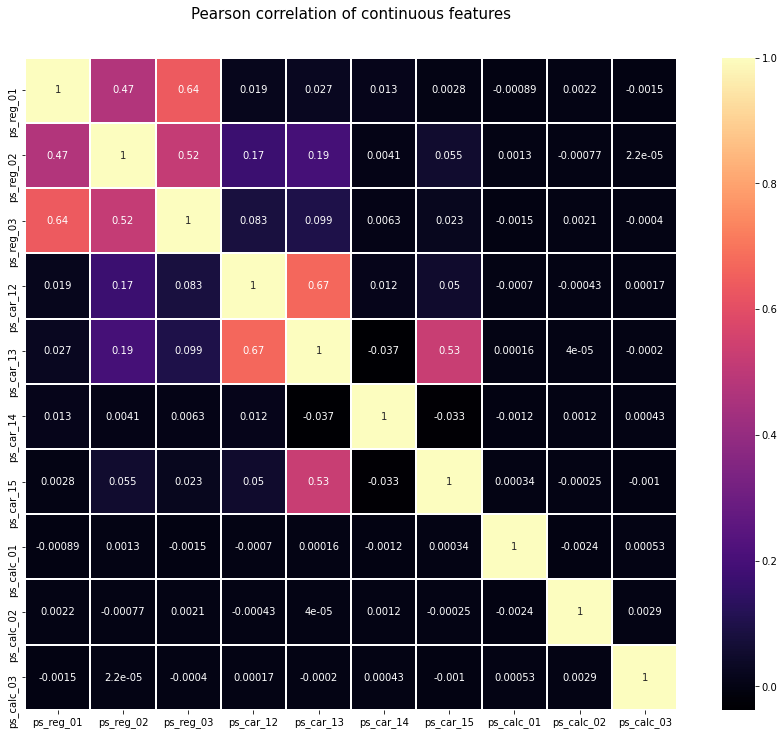

In [118]:
train_float = train.select_dtypes(include=['float64'])
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size = 15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Xử lí imbalanced classes bằng undersampling:
- Cách 1: oversampling records with target =1
- Cách 2: undersampling records with target =0


The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Bởi vì tập data tương đối lớn => chọn undersampling

desired_apriori=0.10 # Chọn apriori = 0.1

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

In [119]:
train.shape

(595212, 58)

# Kiểm tra độ sạch của data:

## - For TRAIN SET

##  Kiểm tra NaN:
Lưu ý: NaN được đại diện bởi -1.

In [120]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0]
        
        print('Variable TRAIN {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable TRAIN ps_ind_02_cat has 216 records (0.04%) with missing values
Variable TRAIN ps_ind_04_cat has 83 records (0.01%) with missing values
Variable TRAIN ps_ind_05_cat has 5809 records (0.98%) with missing values
Variable TRAIN ps_reg_03 has 107772 records (18.11%) with missing values
Variable TRAIN ps_car_01_cat has 107 records (0.02%) with missing values
Variable TRAIN ps_car_02_cat has 5 records (0.00%) with missing values
Variable TRAIN ps_car_03_cat has 411231 records (69.09%) with missing values
Variable TRAIN ps_car_05_cat has 266551 records (44.78%) with missing values
Variable TRAIN ps_car_07_cat has 11489 records (1.93%) with missing values
Variable TRAIN ps_car_09_cat has 569 records (0.10%) with missing values
Variable TRAIN ps_car_11 has 5 records (0.00%) with missing values
Variable TRAIN ps_car_12 has 1 records (0.00%) with missing values
Variable TRAIN ps_car_14 has 42620 records (7.16%) with missing values
In total, there are 13 variables with missing values


## Loại bỏ những cột có quá nhiều missing values, thay thế missing values bởi các giá trị thích hợp.
===> Remove: ps_car_03_cat và ps_car_05_cat (~50% missing values)

===> ps_reg_03 (dạng continuous) có 18% missing values => thay bằng MEAN (hoặc Median)

===> ps_car_11 (ordinal) có 5 records with missing values => thay bằng MODE

===> ps_car_12 (continuous) có 1 records of missing values => thay bằng MEAN

===> ps_car_14 (continuous) có 7% missing values  => thay bằng MEAN.

* Lưu ý : ở điểm này, với các dữ liệu trong nhóm Categorical, mặc dù có missing values, nhưng chúng ta vẫn giữ nguyên và sẽ phân tích ở bước EDV sau. Vì chúng ta sẽ tìm hiểu cách điền ở những cột Categorical ở những người khiếu nại. Mặt khác, không có ý nghĩa nếu ta thay những NaN này thành Means/ Mode....

In [121]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy='mean', fill_value=None, verbose=0, copy=True)
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent', fill_value=None, verbose=0, copy=True)
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

##  - FOR TEST SET

In [122]:
vars_test_with_missing = []

for f in test.columns:
    missings = test[test[f] == -1][f].count()
    if missings > 0:
        vars_test_with_missing.append(f)
        missings_perc = missings/test.shape[0]
        
        print('Variable TEST {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_test_with_missing)))

Variable TEST ps_ind_02_cat has 307 records (0.03%) with missing values
Variable TEST ps_ind_04_cat has 145 records (0.02%) with missing values
Variable TEST ps_ind_05_cat has 8710 records (0.98%) with missing values
Variable TEST ps_reg_03 has 161684 records (18.11%) with missing values
Variable TEST ps_car_01_cat has 160 records (0.02%) with missing values
Variable TEST ps_car_02_cat has 5 records (0.00%) with missing values
Variable TEST ps_car_03_cat has 616911 records (69.10%) with missing values
Variable TEST ps_car_05_cat has 400359 records (44.84%) with missing values
Variable TEST ps_car_07_cat has 17331 records (1.94%) with missing values
Variable TEST ps_car_09_cat has 877 records (0.10%) with missing values
Variable TEST ps_car_11 has 1 records (0.00%) with missing values
Variable TEST ps_car_14 has 63805 records (7.15%) with missing values
In total, there are 12 variables with missing values


In [123]:
# Dropping the variables with too many missing values
vars_test_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
test.drop(vars_test_to_drop, inplace=True, axis=1)
meta.loc[(vars_test_to_drop),'keep'] = False  # Updating the meta

# Imputing with the mean or mode

#mean_imp = SimpleImputer(missing_values=-1, strategy='mean', fill_value=None, verbose=0, copy=True)
#mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent', fill_value=None, verbose=0, copy=True)
test['ps_reg_03'] = mean_imp.fit_transform(test[['ps_reg_03']]).ravel()
test['ps_car_12'] = mean_imp.fit_transform(test[['ps_car_12']]).ravel()
test['ps_car_14'] = mean_imp.fit_transform(test[['ps_car_14']]).ravel()
test['ps_car_11'] = mode_imp.fit_transform(test[['ps_car_11']]).ravel()

In [124]:
test.describe()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.00000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.012383,7.296862,0.660591,0.120399,0.154973,0.611057,0.439868,0.894895,8.292038,0.82994,0.725798,6.564297,0.910144,0.832311,1.327911,0.992134,62.284293,2.346610,0.379957,0.813637,0.374672,3.068325,0.449632,0.450453,0.450054,2.371390,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.127251,3.541948,0.473509,0.325428,0.361879,0.287699,0.404678,0.313025,2.508331,0.37570,2.154886,5.500485,0.347283,0.373590,0.978741,0.091530,33.003714,0.831659,0.058385,0.224779,0.043967,0.729005,0.287213,0.287373,0.287254,1.116953,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,-1.000000,-1.00000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.141421,0.275778,0.109545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.667083,7.000000,1.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.671234,0.353553,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.894895,7.000000,1.00000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.766081,0.374672,3.316625,0.400000,0.500000,0.400000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2.000000,6.000000,1.000

## Đếm số lượng các distinct values trong categorical features (nomial):
Vì ở các bước sau, chúng ta sẽ áp dụng one-hot vector, vdu 5 distinct values trong ps_ind_02_cat => tăng 4 cột trong data frame.

## For Train Set

In [125]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable TRAIN {} has {} distinct values'.format(f, dist_values))

train['ps_car_11_cat'] 

Variable TRAIN ps_ind_02_cat has 5 distinct values
Variable TRAIN ps_ind_04_cat has 3 distinct values
Variable TRAIN ps_ind_05_cat has 8 distinct values
Variable TRAIN ps_car_01_cat has 13 distinct values
Variable TRAIN ps_car_02_cat has 3 distinct values
Variable TRAIN ps_car_04_cat has 10 distinct values
Variable TRAIN ps_car_06_cat has 18 distinct values
Variable TRAIN ps_car_07_cat has 3 distinct values
Variable TRAIN ps_car_08_cat has 2 distinct values
Variable TRAIN ps_car_09_cat has 6 distinct values
Variable TRAIN ps_car_10_cat has 3 distinct values
Variable TRAIN ps_car_11_cat has 104 distinct values


0          12
1          19
2          60
3         104
4          82
         ... 
595207     31
595208     63
595209     31
595210    101
595211     34
Name: ps_car_11_cat, Length: 595212, dtype: int64

In [126]:
#FOR TEST 

#v_test = meta_test[(meta_test.level == 'nominal') & (meta_test.keep)].index

for f in v:
    dist_values = test[f].value_counts().shape[0]
    print('Variable TEST {} has {} distinct values'.format(f, dist_values))

test['ps_car_11_cat'] 

Variable TEST ps_ind_02_cat has 5 distinct values
Variable TEST ps_ind_04_cat has 3 distinct values
Variable TEST ps_ind_05_cat has 8 distinct values
Variable TEST ps_car_01_cat has 13 distinct values
Variable TEST ps_car_02_cat has 3 distinct values
Variable TEST ps_car_04_cat has 10 distinct values
Variable TEST ps_car_06_cat has 18 distinct values
Variable TEST ps_car_07_cat has 3 distinct values
Variable TEST ps_car_08_cat has 2 distinct values
Variable TEST ps_car_09_cat has 6 distinct values
Variable TEST ps_car_10_cat has 3 distinct values
Variable TEST ps_car_11_cat has 104 distinct values


0          65
1         103
2          29
3          40
4         101
         ... 
892811     18
892812     83
892813     17
892814     28
892815     48
Name: ps_car_11_cat, Length: 892816, dtype: int64

## Xử lí tránh data leakage cho kiểu dữ liệu Categorical:

In [127]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)


In [128]:
train_encoded, test_encoded = target_encode(train['ps_car_11_cat'], 
                             test['ps_car_11_cat'], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

NHẬN XÉT: Đến bước này, chúng ta đã cơ bản hoàn thành tất cả những bước xử lí dữ liệu cơ bản.

# Heatmap for all variables

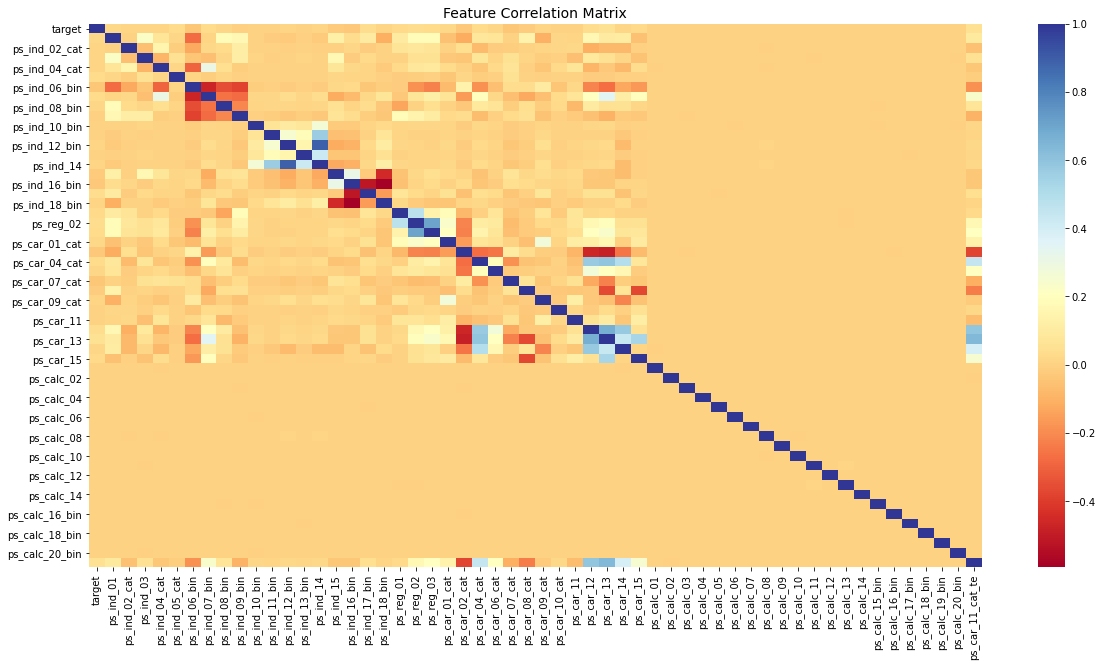

In [129]:
# Checking the correlation between variables by using heatmap:
fig,ax = plt.subplots(figsize=(20,10))
# Imbalanced DataFrame Correlation
train_df = pd.DataFrame(train)
corr = train_df.corr()
sns.heatmap(corr, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

In [130]:
calc_columns = train.columns.values[train.columns.get_loc("ps_calc_01"):]
print(calc_columns)

['ps_calc_01' 'ps_calc_02' 'ps_calc_03' 'ps_calc_04' 'ps_calc_05'
 'ps_calc_06' 'ps_calc_07' 'ps_calc_08' 'ps_calc_09' 'ps_calc_10'
 'ps_calc_11' 'ps_calc_12' 'ps_calc_13' 'ps_calc_14' 'ps_calc_15_bin'
 'ps_calc_16_bin' 'ps_calc_17_bin' 'ps_calc_18_bin' 'ps_calc_19_bin'
 'ps_calc_20_bin' 'ps_car_11_cat_te']


In [131]:
#drop
train.drop(calc_columns,axis = 1,inplace=True)

In [132]:
#update metadata: 

data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == int:
        level = 'ordinal'
    elif train[f].dtype == float:
        level = 'interval'
    
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)

In [133]:
meta.shape

(35, 4)

### Test

In [134]:
test.drop(calc_columns,axis = 1,inplace=True)

# EDV (Exploratory Data Visualization):

## Catergorical Variables và phần trăm khách hàng với target = 1:

<Figure size 432x288 with 0 Axes>

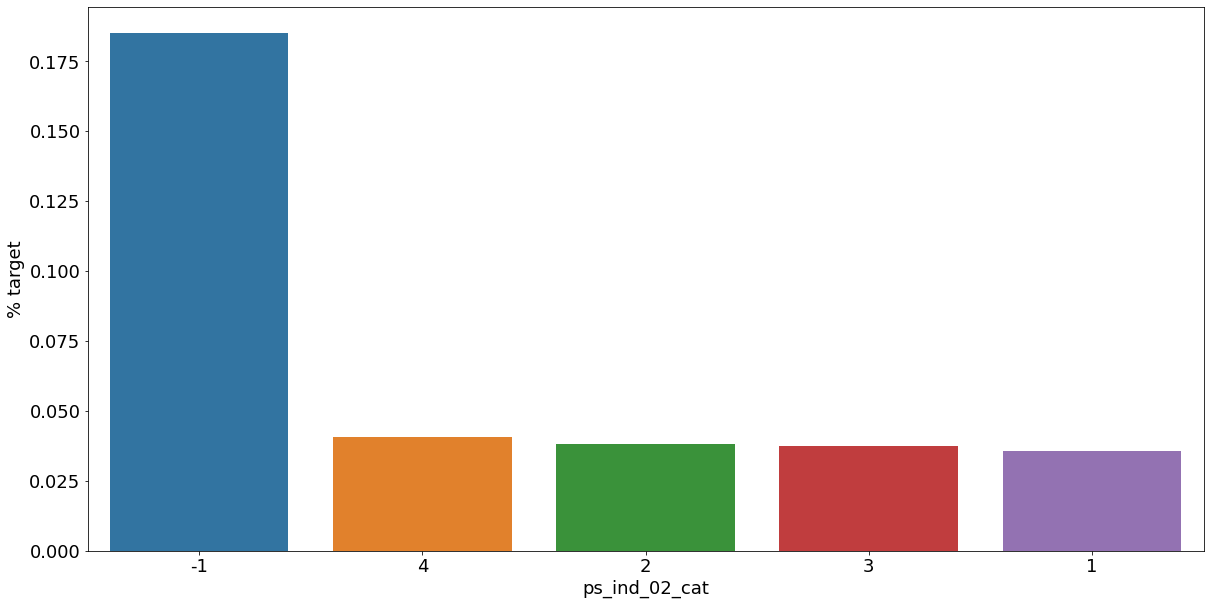

<Figure size 432x288 with 0 Axes>

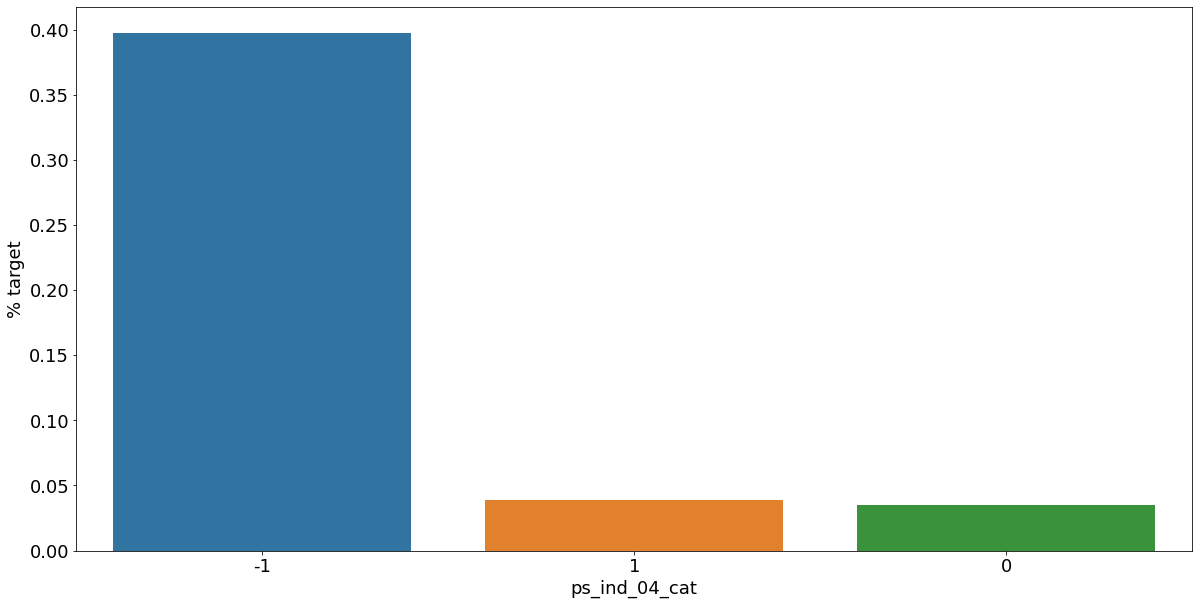

<Figure size 432x288 with 0 Axes>

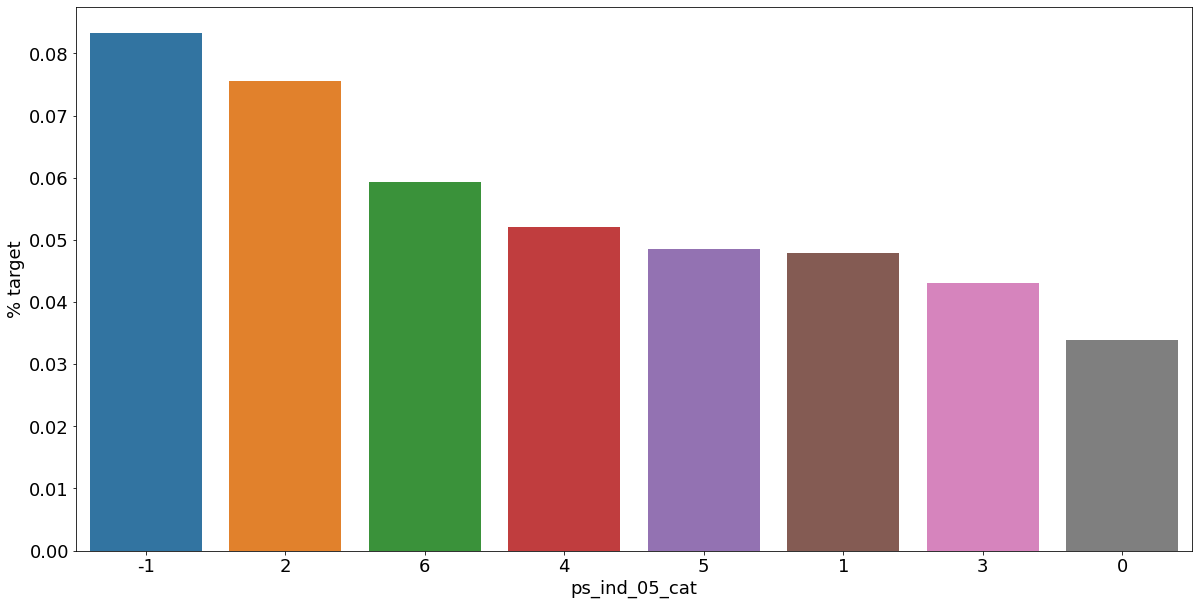

<Figure size 432x288 with 0 Axes>

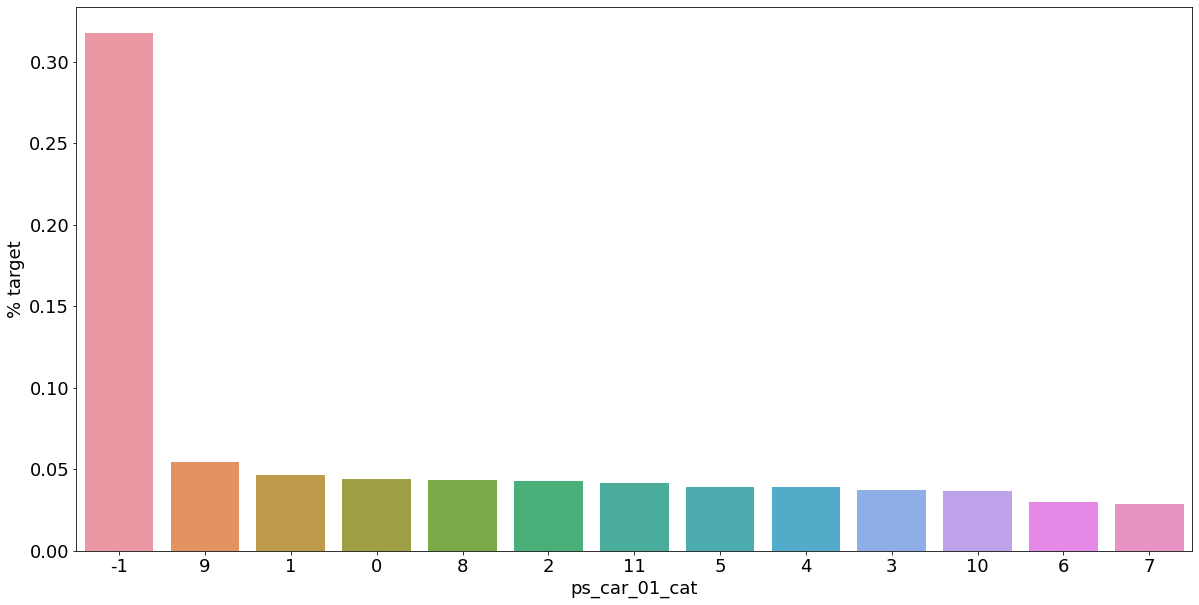

<Figure size 432x288 with 0 Axes>

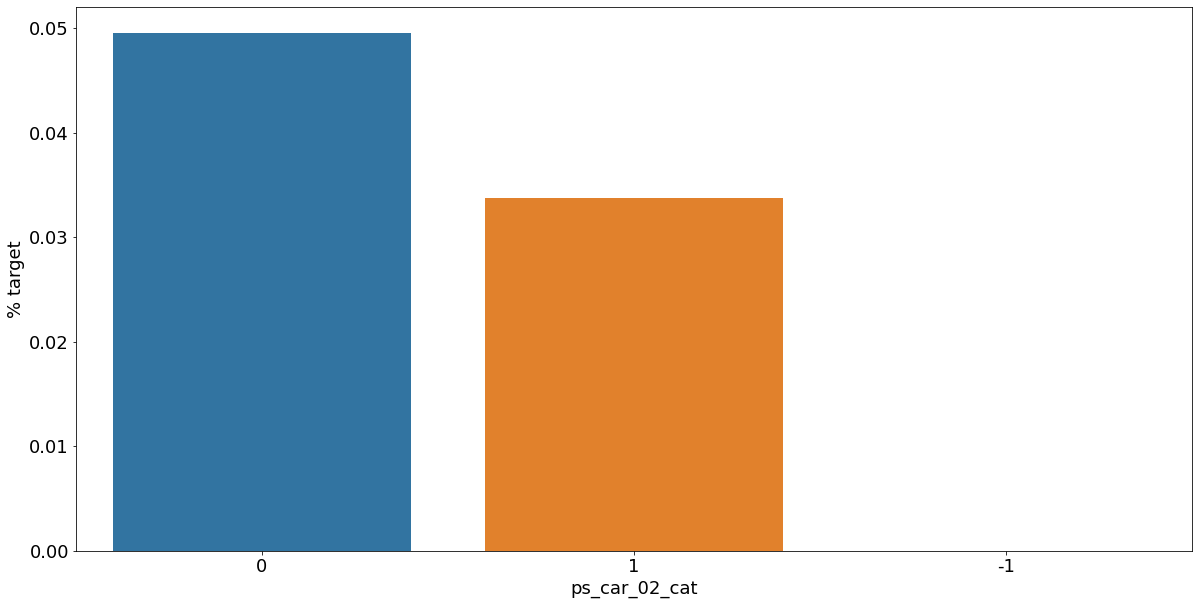

<Figure size 432x288 with 0 Axes>

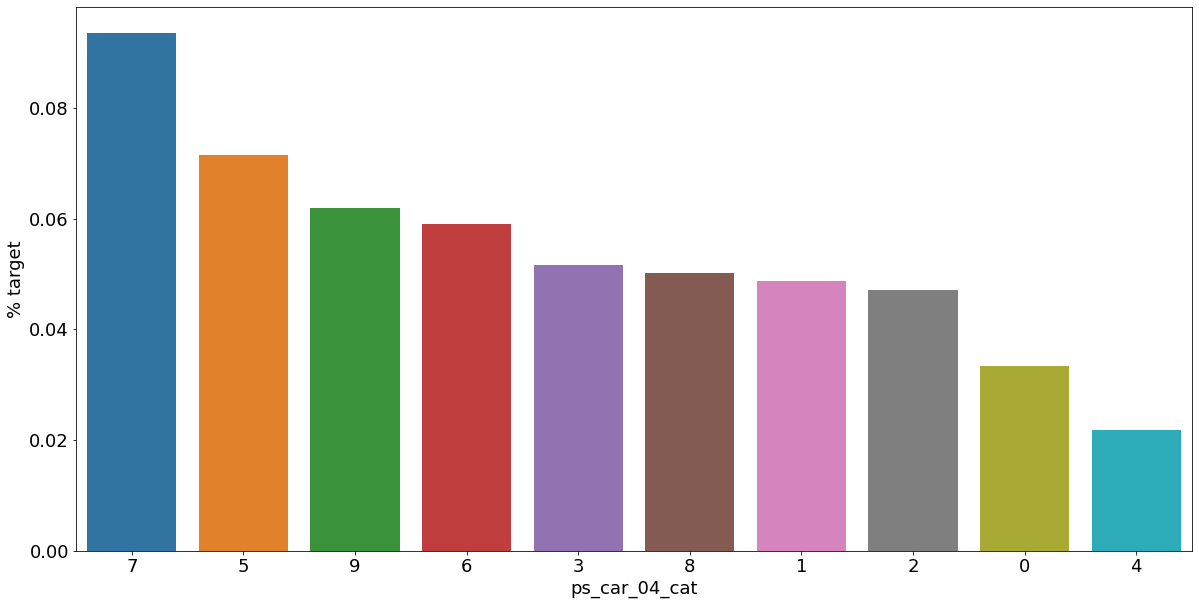

<Figure size 432x288 with 0 Axes>

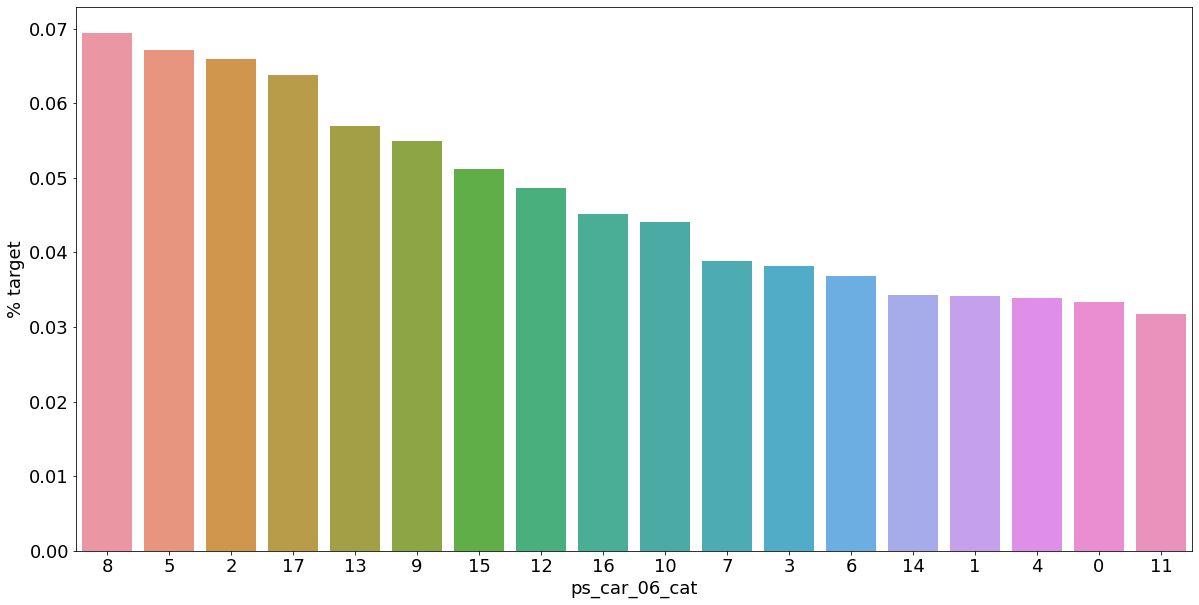

<Figure size 432x288 with 0 Axes>

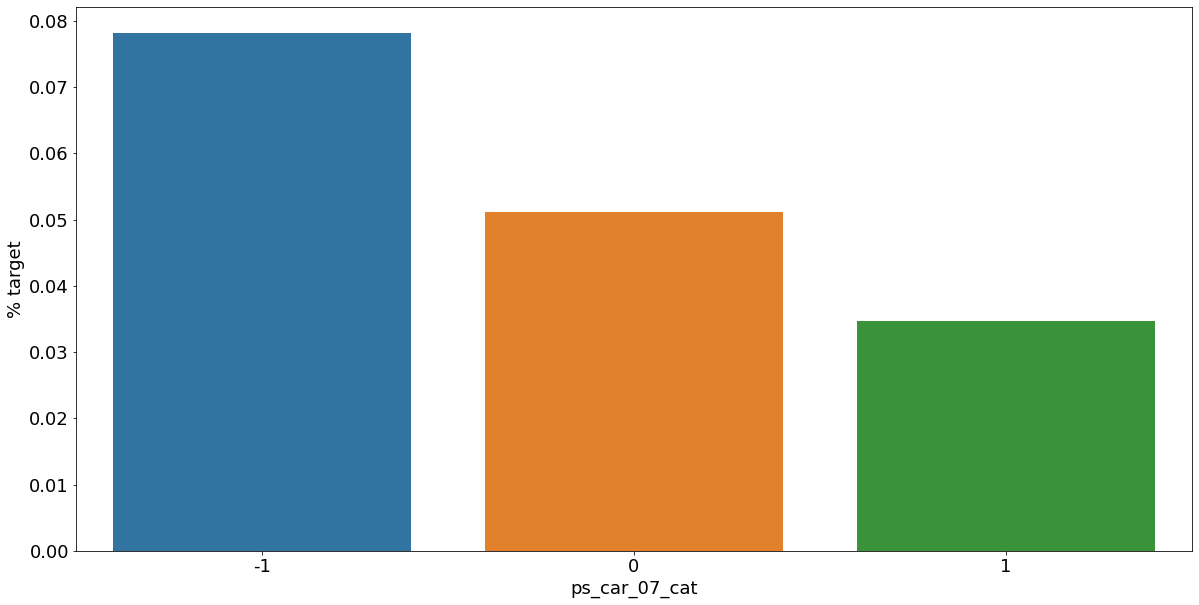

<Figure size 432x288 with 0 Axes>

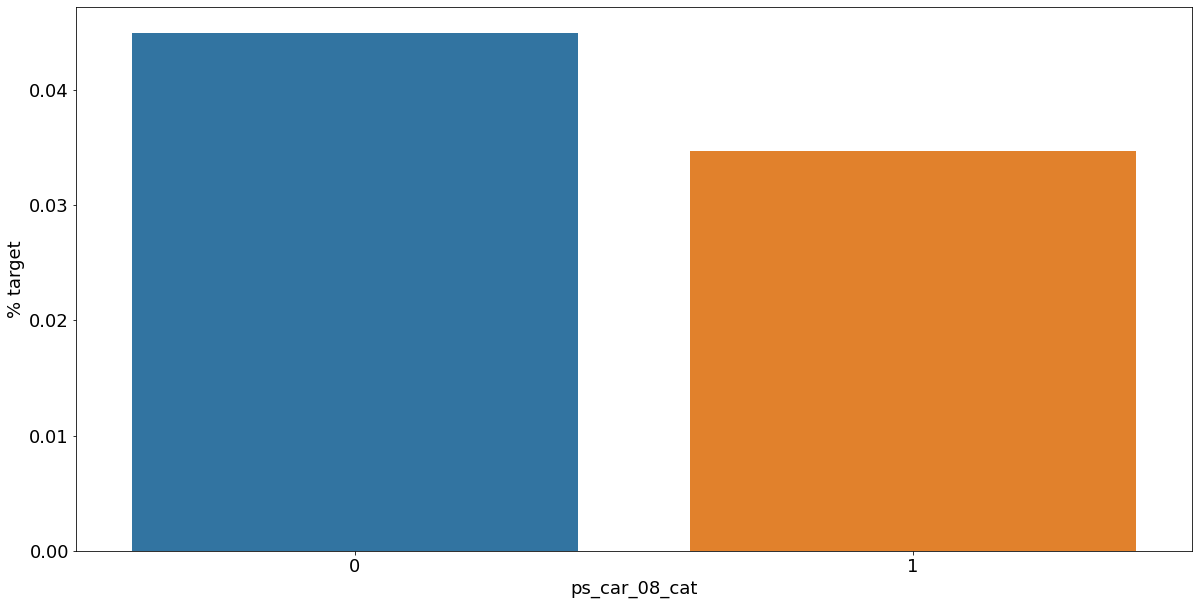

<Figure size 432x288 with 0 Axes>

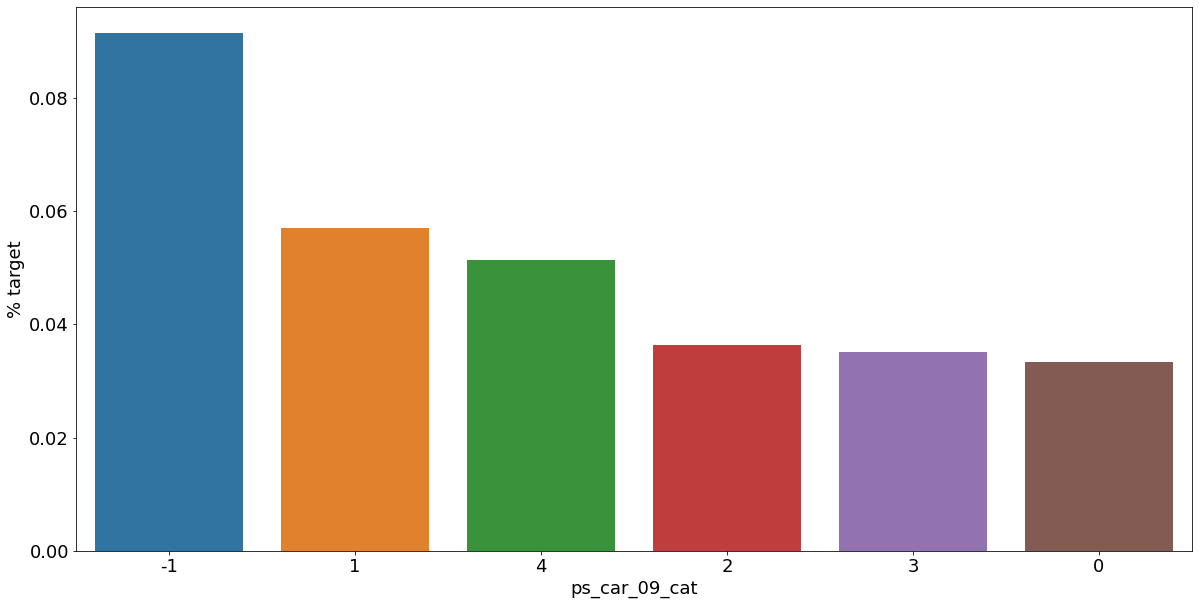

<Figure size 432x288 with 0 Axes>

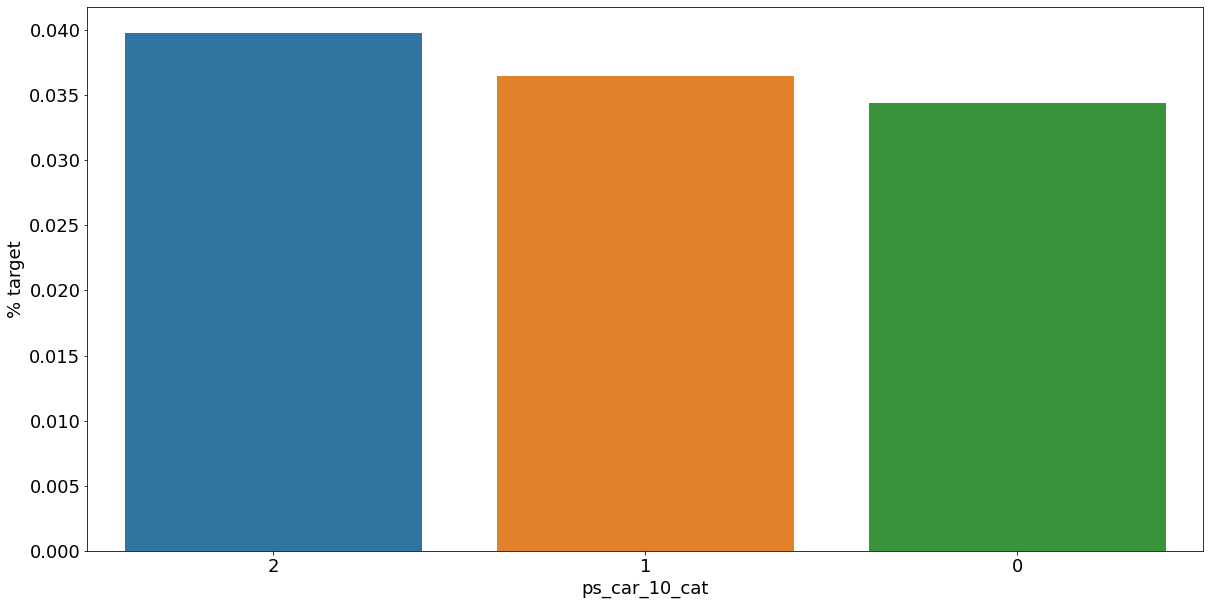

In [135]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

## Heat map với những biến continuous:

In [136]:
# So sánh với lúc chưa xử lí data:

from IPython import display
#display.Image("C:/Users/DELL/OneDrive/Desktop/Kaggle_MaSSP/Heat_map_chua_xu_li.png")

<AxesSubplot:title={'center':'Pearson correlation of continuous features'}>

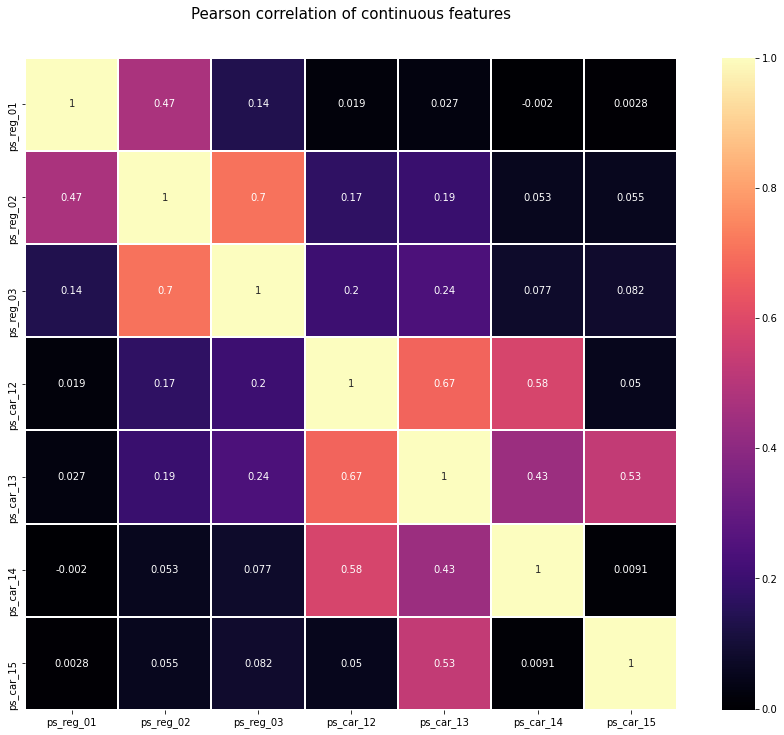

In [137]:
train_float = train.select_dtypes(include=['float64'])
colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size = 15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

* Nhận xét: các biến có strong correlations:

- ps_reg_02 và ps_reg_03 (0.7)

- ps_car_12 và ps_car13 (0.67)

- ps_car_12 and ps_car14 (0.58)

- ps_car_13 and ps_car15 (0.67)

# Một vài model linear regression đơn giản:

## Mô hình linear regression between: ps_reg_02 và ps_reg_03 trên 10% data train
* Khoảng màu neighboring: 95% confidence interval

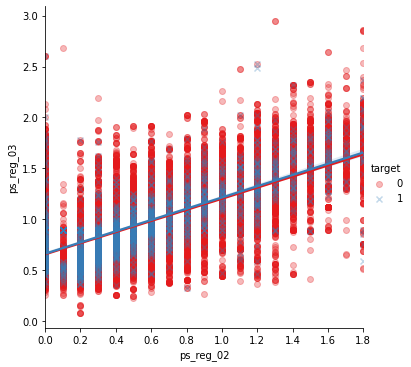

In [138]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train.sample(frac=0.1), hue='target', markers=["o","x"],palette='Set1', scatter_kws={'alpha':0.3})
plt.show()


## Mô hình linear regression between: ps_car_12 và ps_car_13 trên 10% data train

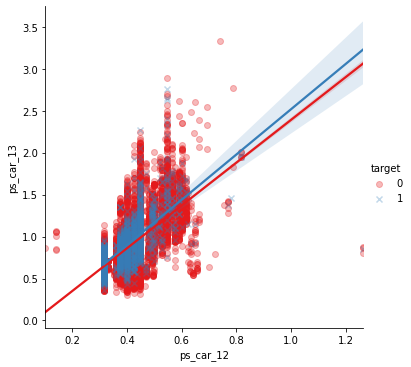

In [139]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train.sample(frac=0.1), hue='target', markers=["o","x"],palette='Set1', scatter_kws={'alpha':0.3})
plt.show()


## Mô hình linear regression between: ps_car_12 và ps_car_14 trên 10% data train



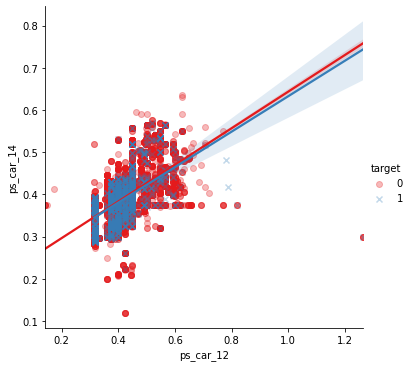

In [140]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train.sample(frac=0.1), hue='target', markers=["o","x"],palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

## Mô hình linear regression between: ps_car_13 và ps_car_15 trên 10% data train

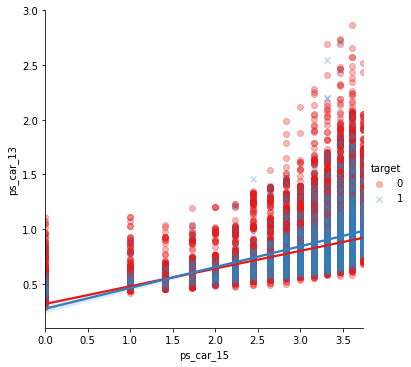

In [141]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=train.sample(frac=0.1), hue='target', markers=["o","x"],palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

# Biến tấu trên các features:

## Tạo dummy variables:
Các giá trị trong categorical variables không đại diện cho bất cứ thông tin gì về độ lớn (ví dụ như 1 - Học sinh, 2- Giáo viên; category 2 không gấp 2 lần category 1) ==> Tạo ra dummy variables để xử lí. Chúng ta cũng đồn thời loại bỏ biến dummy đầu tiên, vì biến này có thể suy ra từ những biến dummy khác được sinh ra bởi một original variable ban đầu.

In [142]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 35 variables in train
After dummification we have 87 variables in train


In [143]:
#FOR TEST SET

#v = meta_test[(meta_test.level == 'nominal') & (meta_test.keep)].index
print('Before dummification we have {} variables in TEST'.format(test.shape[1]))
test = pd.get_dummies(test, columns=v, drop_first=True)
print('After dummification we have {} variables in TEST'.format(test.shape[1]))

Before dummification we have 34 variables in TEST
After dummification we have 86 variables in TEST


## Tạo interaction giữa các variables:

In [144]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 87 variables in train
After creating interactions we have 115 variables in train


In [145]:
#FOR TEST SET

#v_test = meta_test[(meta_test.level == 'interval') & (meta_test.keep)].index
#poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
#interact = pd.DataFrame(data=poly.fit_transform(test[v]), columns=poly.get_feature_names(v_test))
#interact.drop(v_test, axis=1, inplace=True)  # Remove the original columns


poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(test[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in test'.format(test.shape[1]))
test = pd.concat([test, interactions], axis=1)
print('After creating interactions we have {} variables in test'.format(test.shape[1]))

Before creating interactions we have 86 variables in test
After creating interactions we have 114 variables in test


# Lựa chọn các features phù hợp: 

In [146]:
# Copy data set train:
train_copy = train.copy(deep=True)

## Cách 1: Loại các features với low variance by VarianceThreshold = 0.01
Sẽ loại bỏ những feature ít hơn 1% variance

In [147]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['target'], axis=1).columns[f(selector.get_support())]
print('Có {} variables có variance quá thấp.'.format(len(v)))
print('Những variables đó là: {}'.format(list(v)))

Có 28 variables có variance quá thấp.
Những variables đó là: ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [148]:
#FOR TEST SET
selector.fit(test)     # Fit to test without id variables

#f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v_test = test.columns[f(selector.get_support())]
print('Có {} variables in test có variance quá thấp.'.format(len(v_test)))
print('Những variables in test đó là: {}'.format(list(v_test)))

Có 28 variables in test có variance quá thấp.
Những variables in test đó là: ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_0', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


#### Cách 2: Sử dụng Random Forest & SelectFromModel
Ý tưởng: giữa lại khoảng 50% variables tốt nhất.

#X_train = train.drop(['id', 'target'], axis=1)
#y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

train_copy = train_copy[selected_vars + ['target']]
train_copy.shape

## Chọn cách 1:

In [149]:
vars_to_drop = v
train.drop(v, inplace=True, axis=1)

In [150]:
train.shape

(595212, 87)

In [151]:
train.head()

,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_13,ps_car_15,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_6,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_car_12 ps_car_13,ps_car_12 ps_car_15,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_14 ps_car_15,ps_car_15^2
0,0,2,5,0,1,0,0,0,11,0,1,0,0.7,0.2,0.718070,2,0.883679,3.605551,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0.49,0.14,0.502649,0.280000,0.618575,0.259567,2.523886,0.04,0.143614,0.080000,0.176736,0.074162,0.721110,0.515625,0.287228,0.634544,0.266268,2.589039,0.353472,1.442221,0.780888,0.327677,3.186150,1.336974,13.0
1,0,1,7,0,0,1,0,0,3,0,0,1,0.8,0.4,0.766078,3,0.618817,2.449490,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0.64,0.32,0.612862,0.252982,0.495053,0.310973,1.959592,0.16,0.306431,0.126491,0.247527,0.155486,0.979796,0.586875,0.242255,0.474062,0.297787,1.876499,0.195687,0.774597,0.382934,0.240544,1.515785,0.952155,6.0
2,0,5,9,0,0,1,0,0,12,1,0,0,0.0,0.0,0.894047,1,0.641586,3.316625,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.799321,0.282723,0.573608,0.310480,2.965220,0.202887,1.048809,0.411632,0.222807,2.127899,1.151781,11.0
3,0,0,2,1,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1,0.542949,2.000000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0.81,0.18,0.522853,0.336749,0.488654,0.265462,1.800000,0.04,0.116190,0.074833,0.108590,0.058992,0.400000,0.337500,0.217371,0.315425,0.171355,1.161895,0.203153,0.748331,0.294793,0.160147,1.085898,0.589915,4.0
4,0,0,0,1,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3,0.565832,2.000000,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0.49,0.42,0.588531,0.221249,0.396082,0.255572,1.400000,0.36,0.504455,0.189642,0.339499,0.219062,1.200000,0.706875,0.265738,0.475728,0.306963,1.681517,0.178842,0.632139,0.320165,0.206587,1.131663,0.730205,4.0


In [152]:
### FOR TEST SET 

#vars_test_to_drop = v_test
test.drop(v, inplace=True, axis=1)

In [153]:
test.shape

(892816, 86)

In [154]:
test.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_13,ps_car_15,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_6,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_car_12 ps_car_13,ps_car_12 ps_car_15,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_14 ps_car_15,ps_car_15^2
0,0,8,0,1,0,0,0,12,1,0,0,0.5,0.3,0.610328,1,0.669556,3.464102,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.25,0.15,0.305164,0.158114,0.334778,0.176068,1.732051,0.09,0.183098,0.094868,0.200867,0.105641,1.039230,0.372500,0.193003,0.408649,0.214919,2.114237,0.211732,1.095445,0.448306,0.235775,2.319411,1.219836,12.0
1,4,5,0,0,0,1,0,5,1,0,0,0.9,0.5,0.771362,1,0.606320,2.828427,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0.81,0.45,0.694226,0.284605,0.545688,0.322497,2.545584,0.25,0.385681,0.158114,0.303160,0.179165,1.414214,0.595000,0.243926,0.467692,0.276402,2.181742,0.191735,0.894427,0.367624,0.217262,1.714932,1.013509,8.0
2,5,3,0,0,0,1,0,10,0,0,0,0.4,0.0,0.916174,3,0.896239,3.316625,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0.16,0.00,0.366470,0.160000,0.358495,0.159399,1.326650,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.839375,0.366470,0.821111,0.365093,3.038606,0.358495,1.326650,0.803244,0.357149,2.972487,1.321666,11.0
3,0,6,1,0,0,0,0,4,1,0,0,0.1,0.2,0.894895,2,0.652110,2.449490,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0.01,0.02,0.089490,0.037417,0.065211,0.038144,0.244949,0.04,0.178979,0.074833,0.130422,0.076289,0.489898,0.800837,0.334839,0.583570,0.341353,2.192036,0.243997,0.916515,0.425248,0.248744,1.597338,0.934345,6.0
4,5,7,0,0,0,1,0,4,1,0,0,0.9,0.4,0.817771,3,0.812914,3.316625,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0.81,0.36,0.735994,0.336749,0.731623,0.346588,2.984962,0.16,0.327109,0.149666,0.325166,0.154039,1.326650,0.668750,0.305982,0.664778,0.314922,2.712241,0.304165,1.240967,0.660830,0.313051,2.696132,1.277224,11.0


# Pre Apply model:

In [155]:
train_copy = train.copy(deep=True)

X_train = train_copy.loc[:, train_copy.columns != 'target']

#X_train.drop('id',axis = 1,inplace=True)

y_train = train_copy.target 

In [156]:
X_train.shape

(595212, 86)

In [157]:
### FOR TEST SET
test_copy = test.copy(deep=True)

#deeptest_copy_df.describe()

X_test = test_copy.loc[:]

#X_test.drop('id',axis = 1,inplace=True)

In [158]:
X_test.shape

(892816, 86)

## Normalize Train Dataset:

In [159]:
#X_train, X_test 

X_train = (X_train - X_train.mean())/X_train.std()
X_test = (X_test - X_test.mean())/X_test.std()
                                                 
X_train.describe()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_13,ps_car_15,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_6,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_car_12 ps_car_13,ps_car_12 ps_car_15,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_14 ps_car_15,ps_car_15^2
count,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05,5.952120e+05
mean,2.074165e-17,-1.012551e-16,-8.219066e-17,-1.548312e-16,6.018959e-17,4.111921e-17,-2.725364e-17,3.435653e-17,-6.033284e-17,-3.552642e-17,-5.819600e-19,-1.798406e-16,-2.238546e-16,4.765984e-16,1.721289e-16,5.578221e-16,1.317820e-15,-3.497729e-18,8.616589e-17,2.115350e-17,-2.258602e-17,1.881372e-17,1.494593e-17,-3.941809e-17,1.726780e-17,-1.333435e-17,3.079911e-17,-4.333364e-17,-4.960090e-18,6.017168e-17,1.048125e-17,-3.127662e-17,-3.547867e-17,-3.310308e-17,-7.998220e-19,3.010076e-17,-1.103993e-16,-5.410139e-17,-2.103412e-17,-6.482139e-17,-5.145123e-18,1.078685e-16,1.758415e-17,-9.005757e-17,-4.120874e-17,4.899208e-17,-7.820349e-17,7.382237e-17,-2.277702e-17,2.196526e-18,-3.560998e-17,5.906745e-17,-1.551296e-17,-7.595921e-17,-1.421773e-17,-1.650737e-16,-3.674406e-17,-1.341373e-16,6.613453e-18,-1.683207e-17,-4.399021e-17,-3.869228e-16,1.479313e-16,3.931304e-16,1.155564e-16,-3.952792e-16,-5.085674e-16,1.292011e-16,1.445410e-16,2.102935e-16,-8.327699e-17,-1.231010e-16,-3.545957e-16,-5.505640e-17,5.682317e-17,6.076259e-16,-6.463039e-17,-5.680407e-16,-8.105658e-17,1.179833e-15,-1.102871e-15,9.096483e-17,5.084958e-16,4.453098e-16,-8.267055e-16,7.302255e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000

Ở đây, dataset đã bị chia ra hai phần, tỉ lệ 3:1. Nghĩa là: 75% data dùng cho model training và 25% cho testing.

## Predictive Modeling

#### Spliting Data

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics

In [161]:
train_X, val_X, train_y, val_y = train_test_split(X_train,y_train,test_size=0.3, random_state=0)

#### Compare three Basic Models and Performance Summary

In [162]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, f1_score, roc_auc_score

In [163]:
def gini(true, preds):
    res = 2* roc_auc_score(true, preds) - 1
    return res

#X_tr, X_te, y_tr, y_te = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

regressor = ['LGBMClassifier', 'XGBClassifier', 'LogisticRegression']
classifiers = [LGBMClassifier, XGBClassifier, LogisticRegression]
r2 = []
Gini = []


def test_clfs(clfs):
    for clf in clfs:
        #print('------------------------------------------')
        clf = clf(random_state=42)
        clf.fit(train_X, train_y)
        y1_pred = clf.predict(val_X)
        y1_pred_prob = clf.predict_proba(val_X)
        #print(str(clf), '\nresults:')
        
        r2.append(metrics.r2_score(val_y, y1_pred_prob[:, 1]))
        Gini.append(gini(val_y, y1_pred_prob[:, 1]))
        

test_clfs(classifiers)
basic_result = pd.DataFrame({'R squared':r2,'Gini Score':Gini}, index=regressor)
basic_result

[16:42:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,R squared,Gini Score
LGBMClassifier,0.008992,0.272230
XGBClassifier,0.003285,0.240195
LogisticRegression,0.009711,0.263028


Ket qua kha kha quan o model LightGBM. We ould choose LGBM as the model for this project. 

Tuy nhien, cac model nay dang duoc su dung voi parameter default nen chung ta chua the ket luan gi nhieu.

### Cross Validation 

We will use KFold to make sure we have same ratio of classes in each cross-val set.

In [164]:
from sklearn.model_selection import KFold, cross_val_predict

cv = KFold(n_splits=5)

scores_gini = []
i = 1

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('{}: gini score: {}'.format(i, gini_score))
    scores_gini.append(gini_score)
    i +=1
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))

1: gini score: 0.27636828105008293
2: gini score: 0.27289491866658766
3: gini score: 0.2728422676292197
4: gini score: 0.28177396124625953
5: gini score: 0.26481691714969124
mean gini_score: 0.2737392691483682


## Hyperparameter tuning and Model selection

### Light GBM

In [165]:
from sklearn.model_selection import GridSearchCV

def GridSearch(estimator, Features, Target, param_grid):
    #for key, value in scoring.items():
        grid = GridSearchCV(estimator, param_grid, cv=5, scoring='roc_auc')
        grid.fit(Features,Target)
        print(key)
        print('The Best Parameter:', grid.best_params_)
        print(2*grid.best_score_ - 1)
        if grid.best_score_ > 0:
            print('The Score:', grid.best_score_)
        else:
            print('The Score:', np.sqrt(abs(grid.best_score_)))
        print()

In [166]:
# subsample = [0.5, 0.7, 0.9]
# num_leaves = [10, 12, 15, 20, 25, 30]
# learning_rate = [0.1, 0.15, 0.2]
# n_estimators = [50, 100, 150, 200]
# min_child_weight = [0.01, 0.1, 1, 10, 50, 100, 150, 200]
# min_child_samples = [5, 10, 15, 20, 25]

# params = dict(num_leaves=num_leaves, subsample=subsample, learning_rate=learning_rate,
#               n_estimators=n_estimators, min_child_samples=min_child_samples, min_child_weight=min_child_weight)
# clf = GridSearchCV(estimator=LGBMClassifier(random_state=42, n_jobs=-1), param_grid=params, scoring='roc_auc', cv=cv, n_jobs=-1,
#                    verbose=2)
# clf.fit(X_train, y_train)

# print('best params', clf.best_params_)
# print('best score', clf.best_score_)

# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
best_params = {'learning_rate': 0.1, 'min_child_samples': 5, 'min_child_weight': 100, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.5}
print('best parameters', best_params)


best parameters {'learning_rate': 0.1, 'min_child_samples': 5, 'min_child_weight': 100, 'n_estimators': 100, 'num_leaves': 20, 'subsample': 0.5}


In [168]:
mean_gini = []
#
#mean_gini.append(np.mean(scores_gini))

In [169]:
scores_gini = []
i = 1

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    
    #
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    
    #
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('{}: gini score: {}'.format(i, gini_score))
    scores_gini.append(gini_score)
    i +=1
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))
mean_gini.append(np.mean(scores_gini))

1: gini score: 0.28132274419256076
2: gini score: 0.2810123562098288
3: gini score: 0.2814224254548272
4: gini score: 0.2852105728511387
5: gini score: 0.2720336750561203
mean gini_score: 0.2802003547528952


The performance is currently better. 

### XGB Classifier

In [170]:
#test another parameter

model = XGBClassifier(    
                        n_estimators=400,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=0.07, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                        eval_metric='mlogloss',
                     )

In [171]:
scores_gini = []
i = 1

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    
    #clf = LGBMClassifier(random_state=42)
    
    model.fit(train, target_train)
    y_val_pred = model.predict(val)
    y_val_pred_prob = model.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('{}: gini score: {}'.format(i, gini_score))
    scores_gini.append(gini_score)
    i +=1
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))
mean_gini.append(np.mean(scores_gini))

1: gini score: 0.2828360372466512
2: gini score: 0.2813663645474911
3: gini score: 0.2830440360570248
4: gini score: 0.28964266641698977
5: gini score: 0.27410727387919165
mean gini_score: 0.28219927562946967


## Logistic Reg

In [183]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C": [1, 2, 3] } # l1 lasso l2 ridge    "penalty":["l1","l2"]
logreg=LogisticRegression(class_weight='balanced')
logreg_cv=GridSearchCV(logreg , grid, cv=5, scoring='roc_auc', refit=True)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 2}


In [184]:
print('Gini score for best params: ',(2 * logreg_cv.best_score_) - 1) 
print(logreg_cv.best_score_)

Gini score for best params:  0.26123139675301177
0.6306156983765059


We tried list of parameters [0.003, 0.005, 0.01, 0.1, 0.5, 1, 2, 3] and reliaze the best parameter is C=2. 

Because of  

In [187]:
scores_gini = []
i = 1

for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    
    #clf = LGBMClassifier(random_state=42)
    
    logreg=LogisticRegression(class_weight='balanced', C=2) #, 'penalty': 'l2'
    logreg.fit(train, target_train)
    y_val_pred = logreg.predict(val)
    y_val_pred_prob = logreg.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('{}: gini score: {}'.format(i, gini_score))
    scores_gini.append(gini_score)
    i +=1
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))

1: gini score: 0.26629147148979015
2: gini score: 0.25893631715065824
3: gini score: 0.2630545322582225
4: gini score: 0.26248346841503856
5: gini score: 0.2545497099851832
mean gini_score: 0.26106309985977855


In [189]:
mean_gini.append(np.mean(scores_gini))

In [192]:
regressor = ['LGBMClassifier', 'XGBClassifier', 'LogisticRegression']
#classifiers = [LGBMClassifier, XGBClassifier, LogisticRegression]
result = pd.DataFrame({'Mean Gini Score':mean_gini}, index=regressor)
result

,Mean Gini Score
LGBMClassifier,0.280200
XGBClassifier,0.282199
LogisticRegression,0.261063


### Resample Data to deal with its imbalance

In [196]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sm_methods = [SMOTE,RandomUnderSampler,RandomOverSampler]
clf = LGBMClassifier(random_state=42, n_jobs=-1, learning_rate=0.1, min_child_samples= 5, 
                     min_child_weight= 100, n_estimators= 100, num_leaves= 20, subsample= 0.5)

for sm in sm_methods:
    print('------------------------------------------')
    sm = sm(random_state=42)
    
    X_train_resampled, y_train_resampled = sm.fit_resample(train_X, train_y)
    
    clf.fit(X_train_resampled, y_train_resampled)
    
    y_pred = clf.predict(val_X)
    y_pred_prob = clf.predict_proba(val_X)
    
    print(str(sm), 'results:')
    print('training resampled shape', X_train_resampled.shape)
    print('value counts in each class', y_train_resampled.value_counts())
    
    #metrics(y_te, y_pred)
    gini_score = gini(val_y, y_pred_prob[:, 1])
    print('Normalized gini score', gini_score)

------------------------------------------
SMOTE(random_state=42) results:
training resampled shape (802866, 86)
value counts in each class 0    401433
1    401433
Name: target, dtype: int64
Normalized gini score 0.2428757727728561
------------------------------------------
RandomUnderSampler(random_state=42) results:
training resampled shape (30430, 86)
value counts in each class 0    15215
1    15215
Name: target, dtype: int64
Normalized gini score 0.26745028582131525
------------------------------------------
RandomOverSampler(random_state=42) results:
training resampled shape (802866, 86)
value counts in each class 0    401433
1    401433
Name: target, dtype: int64
Normalized gini score 0.2708017023159879


In [198]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

sm_methods = [RandomUnderSampler,RandomOverSampler]

#
for sm in sm_methods:
    print('------------------------------------------')
    sm = sm(random_state=42)
    
    X_train_resampled, y_train_resampled = sm.fit_resample(train_X, train_y)
    
    model.fit(X_train_resampled, y_train_resampled)
    
    y_pred = model.predict(val_X)
    y_pred_prob = model.predict_proba(val_X)
    
    print(str(sm), 'results:')
    print('training resampled shape', X_train_resampled.shape)
    print('value counts in each class', y_train_resampled.value_counts())
    
    #metrics(y_te, y_pred)
    gini_score = gini(val_y, y_pred_prob[:, 1])
    print('Normalized gini score', gini_score)

------------------------------------------
RandomUnderSampler(random_state=42) results:
training resampled shape (30430, 86)
value counts in each class 0    15215
1    15215
Name: target, dtype: int64
Normalized gini score 0.2737456174889399
------------------------------------------
RandomOverSampler(random_state=42) results:
training resampled shape (802866, 86)
value counts in each class 0    401433
1    401433
Name: target, dtype: int64
Normalized gini score 0.2729885462807702


In [199]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=10, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=8, reg_lambda=1.3,
              scale_pos_weight=1.6, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [200]:
clf

LGBMClassifier(min_child_samples=5, min_child_weight=100, num_leaves=20,
               random_state=42, subsample=0.5)

Since gini score is the metric for this competition compared to the previous score, we will not perform resampling on the original dataset.

## Evaluation and Conclusion

In [74]:
from IPython.display import display

pd.set_option('display.max_columns', None)
y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )
display(b)
display(val.loc[b.index])

Numeber of 1s in 1000 smallest probabilities: 10
Number of 1s in 1000 largest probabilities: 128


,target_true,target_pred
541653,0,0.280377
503703,0,0.242811
541628,0,0.237385
505075,0,0.232448
481467,0,0.224908
489722,0,0.221803
510064,0,0.217113
560085,0,0.215212
564377,1,0.211931
490091,0,0.211496


,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_13,ps_car_15,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,ps_ind_04_cat_0,ps_ind_04_cat_1,ps_ind_05_cat_0,ps_ind_05_cat_1,ps_ind_05_cat_3,ps_ind_05_cat_4,ps_ind_05_cat_6,ps_car_01_cat_3,ps_car_01_cat_4,ps_car_01_cat_5,ps_car_01_cat_6,ps_car_01_cat_7,ps_car_01_cat_8,ps_car_01_cat_9,ps_car_01_cat_10,ps_car_01_cat_11,ps_car_02_cat_0,ps_car_02_cat_1,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_1,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_07_cat_0,ps_car_07_cat_1,ps_car_08_cat_1,ps_car_09_cat_0,ps_car_09_cat_1,ps_car_09_cat_2,ps_car_09_cat_3,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_car_12 ps_car_13,ps_car_12 ps_car_15,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_14 ps_car_15,ps_car_15^2
541653,-0.453868,-1.638325,-0.805892,1.700162,-0.442786,-0.476918,-0.097621,-1.494602,-1.395820,2.694236,-0.425746,-2.124134,-1.086379,1.065537e-15,-0.415745,0.056084,0.342818,-1.625950,-0.511866,-0.222954,-0.139601,-1.182226,-0.845618,-2.803019,-0.119079,-0.118432,-0.178323,-0.189636,-0.10636,-0.214469,-0.177308,-0.342198,-0.656443,-0.161298,-0.188019,-0.30312,-0.731764,-0.452653,0.452666,-0.238815,4.903104,-0.189332,-0.181755,-0.498276,-0.143424,-0.234943,5.235425,-0.167045,-0.174644,-0.244080,-0.532593,-0.102981,-0.332498,-0.194666,-0.232701,-3.626311,0.44923,-0.696744,4.412262,-1.209255,-0.159441,-1.487676,-0.902241,-1.486457,-1.993013,-1.763170,-2.055681,-1.855508,-0.595333,-0.766233,-1.012109,-0.910711,-1.057794,-1.013933,-0.141459,0.097668,-0.013982,-0.158256,0.168357,0.091641,0.473768,-0.064256,-0.153042,0.149121,0.072277,0.311037
503703,0.050218,-1.267942,-0.805892,-0.588178,2.258423,-0.476918,-0.097621,0.479430,-1.395820,2.694236,-0.425746,-1.081173,-1.086379,1.065537e-15,-0.415745,-0.050505,0.342818,-1.625950,1.953632,-0.222954,-0.139601,0.845861,-0.845618,-2.803019,-0.119079,-0.118432,-0.178323,-0.189636,-0.10636,-0.214469,-0.177308,-0.342198,-0.656443,-0.161298,-0.188019,-0.30312,1.366558,2.209196,-2.209130,-0.238815,-0.203952,-0.189332,-0.181755,-0.498276,-0.143424,-0.234943,-0.191006,-0.167045,-0.174644,-0.244080,-0.532593,-0.102981,-0.332498,-0.194666,-0.232701,-3.626311,0.44923,-0.696744,4.412262,-1.209255,-0.159441,-1.194087,-0.902241,-0.772565,-0.964181,-0.912516,-1.208424,-0.870244,-0.595333,-0.766233,-1.012109,-0.910711,-1.057794,-1.013933,-0.141459,0.097668,-0.067664,-0.427108,0.168357,0.021707,0.473768,-0.148295,-0.500502,0.074520,-0.346142,0.311037
541628,2.570647,-1.638325,-0.805892,-0.588178,2.258423,-0.476918,-0.097621,-0.930593,-1.395820,2.694236,-0.425746,-0.038212,-0.344291,-9.340530e-01,0.785465,0.434006,-0.090105,-1.625950,1.953632,-0.222954,-0.139601,0.845861,-0.845618,-2.803019,-0.119079,-0.118432,-0.178323,-0.189636,-0.10636,-0.214469,-0.177308,-0.342198,-0.656443,-0.161298,-0.188019,-0.30312,1.366558,2.209196,-2.209130,-0.238815,-0.203952,-0.189332,-0.181755,-0.498276,-0.143424,-0.234943,-0.191006,-0.167045,-0.174644,4.097017,-0.532593,-0.102981,-0.332498,-0.194666,-0.232701,-3.626311,0.44923,-0.696744,-0.226641,0.826954,-0.159441,-0.313320,-0.399616,-0.524942,-0.000689,0.168995,-0.284924,-0.073098,-0.444959,-0.478799,-0.324039,-0.246850,-0.427681,-0.344234,-0.773883,-0.758145,-0.490598,-1.075296,-0.782057,0.255111,-0.015151,0.253633,-0.085533,0.142677,-0.532625,-0.272870
505075,1.058390,-1.638325,-0.805892,1.700162,-0.442786,-0.476918,-0.097621,-0

Trong 1000 high probability value thi chi co 128 value duoc du doan la '1' so voi true_target.

from sklearn.feature_selection import SelectFromModel

features = deep_copy_df.columns
importances = clf.feature_importances_
indices = np.argsort(clf.feature_importances_)[::-1]
imp_features= pd.DataFrame({'feature':features[indices], 'importance':importances[indices]})
display(imp_features)

imp_features_20smallest = imp_features.nsmallest(20, 'importance') # maybe drop

imp_features_10large = imp_features.nlargest(10, 'importance')
plt.figure(figsize=(15,8))
sns.barplot(data=imp_features_10large, x='feature', y='importance',palette='nipy_spectral')
plt.show()

display(imp_features_20smallest)

In [98]:
#drop this feature
features_to_drop = imp_features_20smallest['feature'].tolist()
#X_train.shape

In [99]:
#X_train.drop(features_to_drop, axis=1, inplace=True)

In [105]:
#X_test.drop(features_to_drop, axis=1, inplace=True)

In [101]:
scores_gini = []
for train_index, validation_index in cv.split(X_train, y_train):
    train, val = X_train.iloc[train_index], X_train.iloc[validation_index]
    target_train, target_val = y_train.iloc[train_index], y_train.iloc[validation_index]
    clf = LGBMClassifier(random_state=42, n_jobs=-1)
    clf.set_params(**best_params)
    clf.fit(train, target_train)
    y_val_pred = clf.predict(val)
    y_val_pred_prob = clf.predict_proba(val)
    gini_score = gini(target_val, y_val_pred_prob[:, 1])
    print('gini score:', gini_score)
    scores_gini.append(gini_score)
    
print('mean gini_score: {}'.format(np.mean(scores_gini)))

gini score: 0.279739360891478
gini score: 0.2787914582565125
gini score: 0.2768693784090144
gini score: 0.2885518724821936
gini score: 0.2687237620446712
mean gini_score: 0.27853516641677395


Mean Gini is 0.2785, which is lower than itself before applying feature selection. Therefore, we decide not to use feature selection.  

In [102]:
y_preds = y_val_pred_prob[:,1]
results = pd.DataFrame({'target_true':target_val , 'target_pred': y_preds})
b = results.nlargest(10, columns='target_pred')
b2 = results.nlargest(1000, columns='target_pred')
c = results.nsmallest(1000, columns='target_pred')
c_counts_1 = (c['target_true']==1).sum()
b2_counts_1 =  (b2['target_true']==1).sum()
print('Numeber of 1s in 1000 smallest probabilities:', c_counts_1)
print('Number of 1s in 1000 largest probabilities:', b2_counts_1 )

Numeber of 1s in 1000 smallest probabilities: 8
Number of 1s in 1000 largest probabilities: 134


The ability of fitting prediction and true target is not improve much. 

## Submission

#### Light GBM

In [77]:
clf.fit(X_train, y_train)

LGBMClassifier(min_child_samples=5, min_child_weight=100, num_leaves=20,
               random_state=42, subsample=0.5)

In [78]:
preds =  clf.predict_proba(X_test)[:,1]

In [79]:
#test  = pd.read_csv('../input/massp-housing-prices-in-melbourne/test.csv')
my_submission = pd.DataFrame({'id': test_original.id, 'target': preds})
# you could use any filename. We choose submission here
my_submission.to_csv('./porto_lgbm_sub.csv', index=False)

In [59]:
#export___
#pd.DataFrame(y_test_proba[:,1]).to_csv("test_pred_1.csv", index_label=False)

#### XGBoost

In [85]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='mlogloss',
              gamma=10, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.07, max_delta_step=0,
              max_depth=4, min_child_weight=6, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=8, reg_lambda=1.3,
              scale_pos_weight=1.6, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [95]:
pred_xgb =  model.predict_proba(X_test)[:,1]

In [97]:
sum(pred_xgb)

50482.39123496227

In [98]:
#test  = pd.read_csv('../input/massp-housing-prices-in-melbourne/test.csv')
my_submission = pd.DataFrame({'id': test_original.id, 'target': pred_xgb})
# you could use any filename. We choose submission here
my_submission.to_csv('./porto_xgboost_sub.csv', index=False)